In [148]:
import pandas as pd
import numpy as np

In [150]:
df = pd.read_excel("./Lab Session Data.xlsx",sheet_name = None)

In [151]:
pdata = df['Purchase data'].iloc[:,0:5]
pdata

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [152]:
A = np.array(pdata.iloc[:,1:4])
A

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]], dtype=int64)

In [153]:
C = np.array(pdata.iloc[:,4])
C

array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198], dtype=int64)

In [154]:
# Dimensionality of the vector space
dimensionality = A.shape[1]
print(f"Dimensionality of the vector space: {dimensionality}")

Dimensionality of the vector space: 3


In [155]:
# Number of vectors in the vector space
num_vectors = A.shape[0]
print(f"Number of vectors in the vector space: {num_vectors}")

Number of vectors in the vector space: 10


In [156]:
# Rank of matrix A
rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")

Rank of Matrix A: 3


In [157]:
# Pseudo-inverse of matrix A
A_pseudo_inv = np.linalg.pinv(A)

# Cost of each product
X = np.dot(A_pseudo_inv, C)
print("Cost of each product:", X)

Cost of each product: [ 1. 55. 18.]


In [158]:
# Mark customers as RICH or POOR
pdata['Category'] = np.where(pdata['Payment (Rs)'] > 200, 'RICH', 'POOR')

# Prepare features and labels
features = pdata.iloc[:, :-2].values
labels = pdata['Category'].values

In [159]:
# Load the IRCTC Stock Price data
irctc_data = pd.read_excel("./Lab Session Data.xlsx", sheet_name='IRCTC Stock Price')

# Calculate mean and variance
price_mean = irctc_data['Price'].mean()
price_variance = irctc_data['Price'].var()
print(f"Mean of Price: {price_mean}, Variance of Price: {price_variance}")

Mean of Price: 1560.6634538152612, Variance of Price: 58732.36535253922


In [160]:
# Ensure the 'Date' column is in datetime format
irctc_data['Date'] = pd.to_datetime(irctc_data['Date'])

In [161]:
# Calculate sample mean for Wednesdays
wednesday_data = irctc_data[irctc_data['Date'].dt.weekday == 2]
wednesday_mean = wednesday_data['Price'].mean()
print(f"Sample mean for Wednesdays: {wednesday_mean}")

Sample mean for Wednesdays: 1550.7060000000001


In [162]:
# Calculate sample mean for April
april_data = irctc_data[irctc_data['Date'].dt.month == 4]
april_mean = april_data['Price'].mean()
print(f"Sample mean for April: {april_mean}")

Sample mean for April: 1698.9526315789474


In [163]:
# Probability of making a loss over the stock
loss_prob = (irctc_data['Chg%'] < 0).mean()
print(f"Probability of making a loss: {loss_prob}")

# Probability of making a profit on Wednesday
profit_wed_prob = (wednesday_data['Chg%'] > 0).mean()
print(f"Probability of making a profit on Wednesday: {profit_wed_prob}")

Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42


In [164]:
# Conditional probability of making profit given that today is Wednesday
conditional_prob = profit_wed_prob / (irctc_data['Chg%'] > 0).mean()
print(f"Conditional probability of making profit given it's Wednesday: {conditional_prob}")

Conditional probability of making profit given it's Wednesday: 0.8433870967741935


In [165]:
# Scatter plot of Chg% data against the day of the week
import seaborn as sns
import matplotlib.pyplot as plt

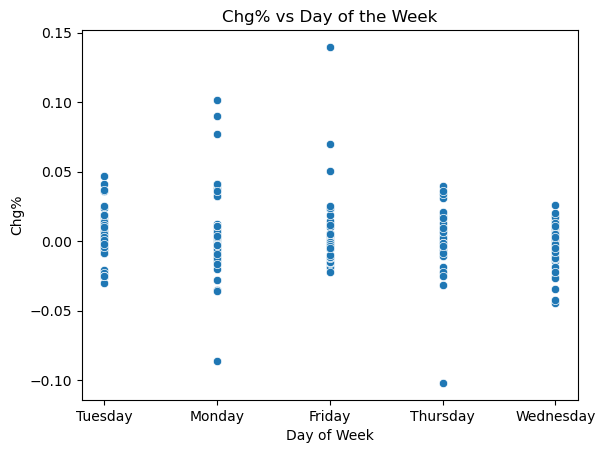

In [166]:
irctc_data['Day of Week'] = irctc_data['Date'].dt.day_name()
sns.scatterplot(x='Day of Week', y='Chg%', data=irctc_data)
plt.title('Chg% vs Day of the Week')
plt.show()

In [171]:
# Load the thyroid data
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Study each attribute
numeric_columns = thyroid_data.select_dtypes(include=['number']).columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_columns)
print()
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Record ID', 'age'], dtype='object')

Categorical Columns: Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


In [184]:
thyroid_data.replace("?",np.nan,inplace = True)

# Study data range for numeric variables
print(thyroid_data.describe())

          Record ID           age          TSH           T3          TT4  \
count  9.172000e+03   9172.000000  8330.000000  6568.000000  8730.000000   
mean   8.529473e+08     73.555822     5.218403     1.970629   108.700305   
std    7.581969e+06   1183.976718    24.184006     0.887579    37.522670   
min    8.408010e+08      1.000000     0.005000     0.050000     2.000000   
25%    8.504090e+08     37.000000     0.460000     1.500000    87.000000   
50%    8.510040e+08     55.000000     1.400000     1.900000   104.000000   
75%    8.607110e+08     68.000000     2.700000     2.300000   126.000000   
max    8.701190e+08  65526.000000   530.000000    18.000000   600.000000   

               T4U          FTI         TBG  
count  8363.000000  8370.000000  349.000000  
mean      0.976056   113.640746   29.870057  
std       0.200360    41.551650   21.080504  
min       0.170000     1.400000    0.100000  
25%       0.860000    93.000000   21.000000  
50%       0.960000   109.000000   26.00

C:\Users\ojast\AppData\Local\Temp\ipykernel_7876\3187923359.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_data.replace("?",np.nan,inplace = True)


In [186]:
# Study presence of missing values
missing_values = thyroid_data.isnull().sum()
print(missing_values)

Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral sourc

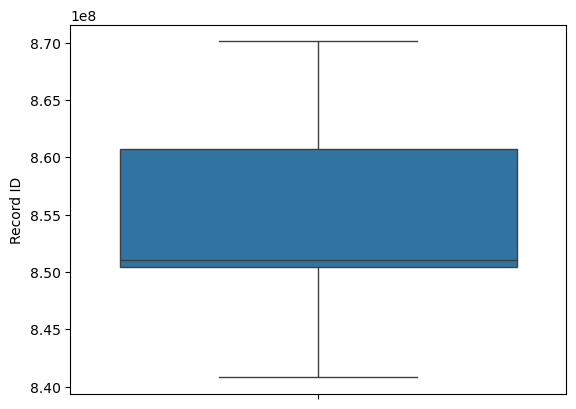

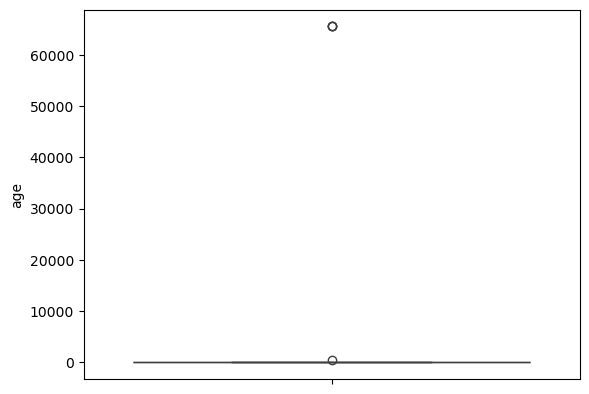

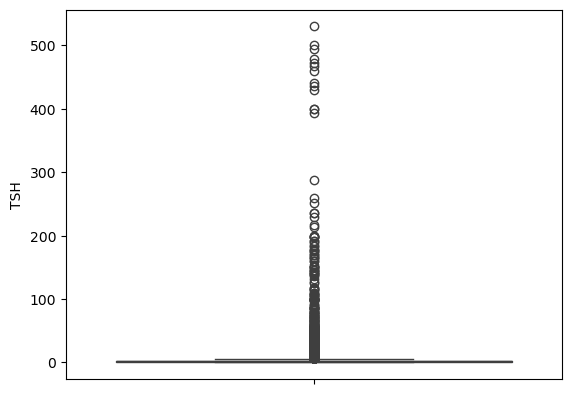

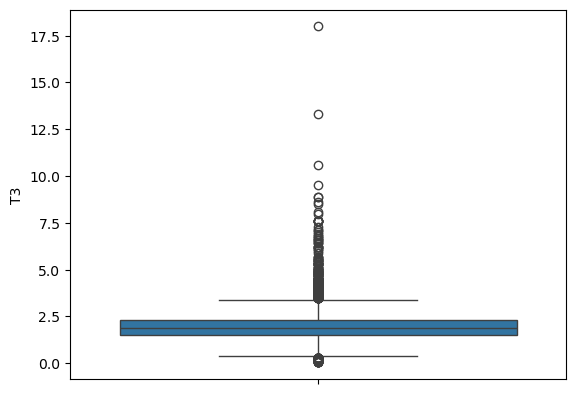

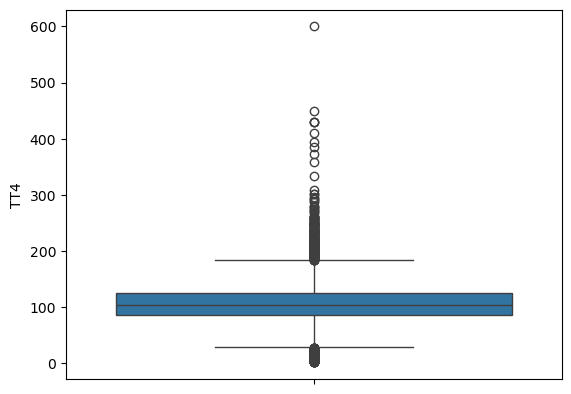

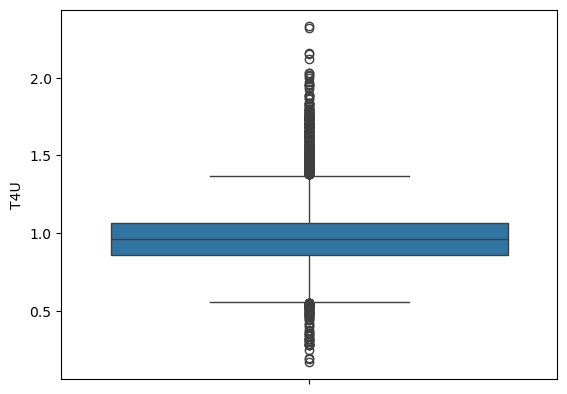

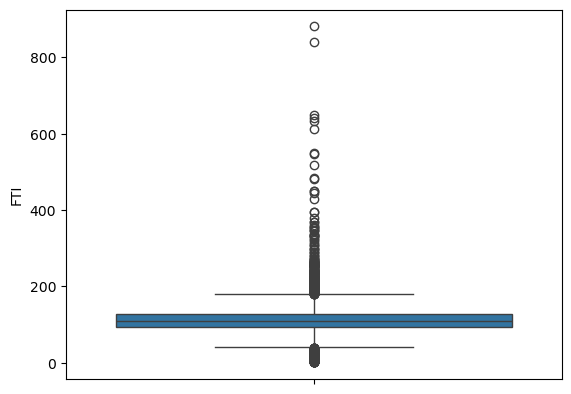

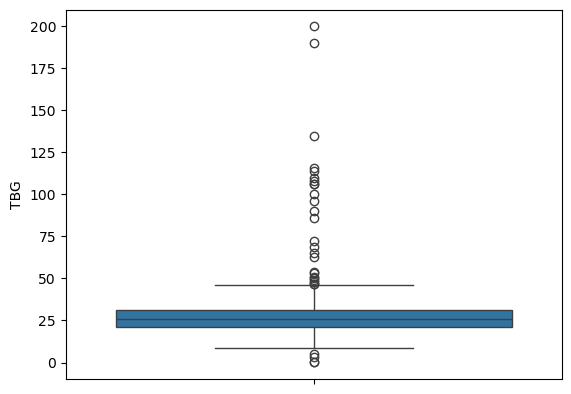

In [187]:
# Study presence of outliers
import seaborn as sns

for column in thyroid_data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(thyroid_data[column])
    plt.show()

In [188]:
# Calculate mean and variance
numeric_columns = thyroid_data.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    print(f"{column} - Mean: {numeric_columns[column].mean()},\n Variance: {numeric_columns[column].var()} \n")

Record ID - Mean: 852947346.6122983,
 Variance: 57486250586150.34 

age - Mean: 73.55582206716092,
 Variance: 1401800.8688713463 

TSH - Mean: 5.218402753781513,
 Variance: 584.866153209295 

T3 - Mean: 1.970628805724726,
 Variance: 0.7877961683561565 

TT4 - Mean: 108.70030469644902,
 Variance: 1407.950791475491 

T4U - Mean: 0.9760557216309935,
 Variance: 0.04014430639006391 

FTI - Mean: 113.64074551935484,
 Variance: 1726.539585061158 

TBG - Mean: 29.87005729512894,
 Variance: 444.38764299946627 



In [196]:
# Impute missing values
for column in thyroid_data.columns:
    if thyroid_data[column].isnull().sum() > 0:
        if thyroid_data[column].dtype == 'object':
            thyroid_data[column].fillna(thyroid_data[column].mode()[0], inplace=True)
        else:
            if thyroid_data[column].nunique() > 10:  # assuming outliers present if unique values > 10
                thyroid_data[column].fillna(thyroid_data[column].median(), inplace=True)
            else:
                thyroid_data[column].fillna(thyroid_data[column].mean(), inplace=True)
thyroid_data.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S
